# [ 220207 ] scikit learn exercise
---
### 1. correlation coefficient 수식으로 구하기

In [1]:
from numpy import mean, std
from numpy.random import randn, seed
from matplotlib import pyplot

In [2]:
seed(1)

d1:mean=100.776 stdv=19.620
d1:mean=151.050 stdv=22.358


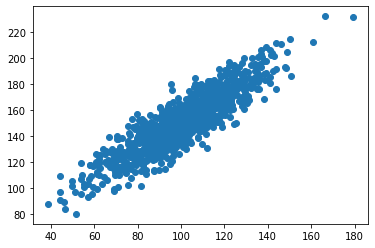

In [3]:
d1=20*randn(1000)+100
d2=d1+(10*randn(1000)+50)

print('d1:mean=%.3f stdv=%.3f'%(mean(d1),std(d1)))
print('d1:mean=%.3f stdv=%.3f'%(mean(d2),std(d2)))

pyplot.scatter(d1,d2)

In [4]:
m1=mean(d1)
s1=std(d1)
m2=mean(d2)
s2=std(d2)
qx=d1-m1
qy=d2-m2
q=qx*qy

q.shape
print(len(q))

r=sum(q)/((len(q)-1)*s1*s2)
print('cc',r)

1000
cc 0.8885004089885196


---
### 2. correlation coefficient pandas

In [5]:
import pandas as pd

rows=[int(i) for i in range(len(d1))]
s_d1=pd.Series(d1,index=rows)
s_d2=pd.Series(d2,index=rows)
clm=['d1','d2']
d=pd.DataFrame(columns=clm)
d['data1']=s_d1
d['data2']=s_d2
d.corr()

,data1,data2
data1,1.000000,0.887612
data2,0.887612,1.000000


---
### 3. correlation coefficient scipy의 pearson 상관계수

In [6]:
from scipy.stats import pearsonr
corr1,_=pearsonr(d1,d2)
print('pearsons cc : %.3f'%corr1)

pearsons cc : 0.888


---
### 4. iris data correlation coefficient 

In [7]:
from sklearn.datasets import load_iris
data=load_iris().data
data.shape

(150, 4)

C:\Users\kk135\Anaconda3\envs\bigdata\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


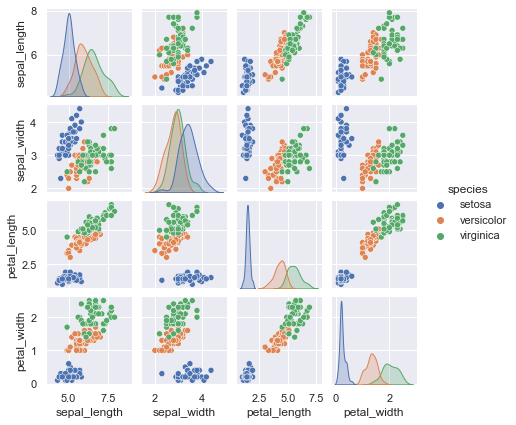

In [8]:
%matplotlib inline
import seaborn as sns
sns.set()
sns_iris=sns.load_dataset('iris')
sns.pairplot(sns_iris,hue='species',size=1.5)

In [9]:
d1=data[:,1]
d2=data[:,3]

m1=mean(d1)
s1=std(d1)
m2=mean(d2)
s2=std(d2)
qx=d1-m1
qy=d2-m2
q=qx*qy

q.shape
print(len(q))

r=sum(q)/((len(q)-1)*s1*s2)
print('cc',r)

150
cc -0.3685831535601737


In [10]:
d1=data[:,2]
d2=data[:,3]

m1=mean(d1)
s1=std(d1)
m2=mean(d2)
s2=std(d2)
qx=d1-m1
qy=d2-m2
q=qx*qy

q.shape
print(len(q))

r=sum(q)/((len(q)-1)*s1*s2)
print('cc',r)

150
cc 0.9693276155061709


In [11]:
from scipy.stats import pearsonr
corr1,_=pearsonr(data[:,2],data[:,3])
print('pearsons cc : %.3f'%corr1)
corr1,_=pearsonr(data[:,1],data[:,3])
print('pearsons cc : %.3f'%corr1)

pearsons cc : 0.963
pearsons cc : -0.366


---
### 5. housing data correlation coefficient

In [12]:
import pandas as pd
housing=pd.read_csv('./datasets/housing/housing.csv')
corr_=housing.corr()
corr_['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
Unnamed: 0            0.072086
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

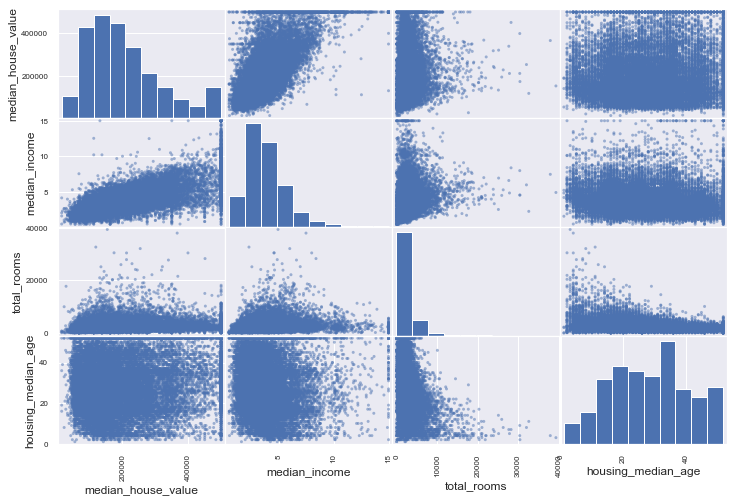

In [13]:
from pandas.plotting import scatter_matrix
attributes=['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8))